In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

import severability

# Severability applied to Zachary's Karate Club graph

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


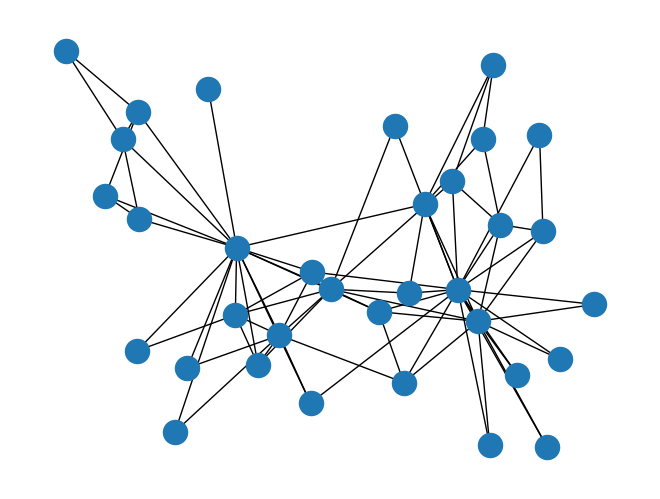

In [2]:
# get Karate Club graph
G = nx.karate_club_graph()
print(G)
nx.draw(G)

In [3]:
# get adjacency matrix and convert to np.matrix
A = nx.to_numpy_array(G)
A = np.matrix(A)

# compute transition matrix
P = severability.transition_matrix(A)

In [12]:
times = np.arange(1,10,1)
n_communities = np.zeros_like(times)
s_communities = np.zeros_like(times)

for i in tqdm(range(len(times))):
    t = times[i]
    partition = severability.node_component_cover(P,t=t)
    n_communities[i] = len(partition)
    sizes = np.zeros(len(partition))
    for j in range((len(partition))):
        sizes[j] = len(partition[j][0])
    s_communities[i] = sizes.mean()
    

100%|██████████| 9/9 [00:25<00:00,  2.84s/it]


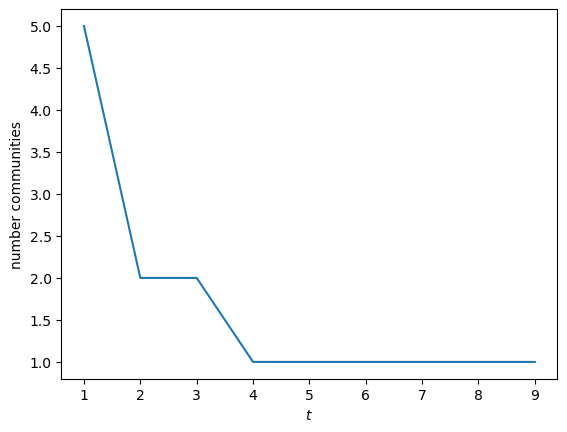

In [13]:
fig, ax = plt.subplots(1)
ax.plot(times,n_communities)
ax.set(xlabel="$t$", ylabel="number communities",xticks=times)
plt.show()

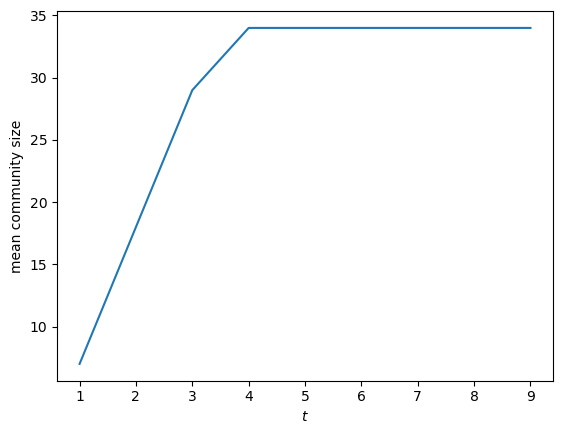

In [14]:
fig, ax = plt.subplots(1)
ax.plot(times,s_communities)
ax.set(xlabel="$t$", ylabel="mean community size",xticks=times)
plt.show()